# Mid-Term Poject - Team Champion

## 1. Business Problem Definition and Dataset Overview

### 1.1 Business Problem Definition
The objective of this project is to develop a predictive model that accurately classifies whether a given cyclone is a hurricane or not, based on various meteorological and geographical features. This classification is crucial for improving early warning systems, disaster preparedness, and response strategies, ultimately reducing the impact of hurricanes on communities, infrastructure, and economies. By utilizing a dataset of historical cyclone attributes, the project aims to address challenges faced in timely detection and classification of cyclonic systems, which can lead to inadequate preparation and increased vulnerability during hurricane events.

Key questions driving this analysis include how to leverage the provided data to distinguish hurricanes from other cyclonic systems, identifying which features are most indicative of a cyclone being classified as a hurricane, and determining the most effective machine learning algorithms for model development and evaluation. The expected outcome is a robust classification model capable of predicting whether a cyclone is a hurricane, serving as a valuable tool for meteorologists and disaster management agencies. This model will enhance monitoring, alerting, and resource planning in anticipation of hurricane threats, ultimately contributing to improved community resilience.

### 1.2 Dataset Overview

#### Dataset Link

https://www.kaggle.com/datasets/noaa/hurricane-database/data

#### Summary of Dataset Attributes

The dataset includes the following key attributes related to hurricanes:

- **ID**: Unique identifier for each hurricane record (categorical).
- **Name**: Name of the hurricane (categorical).
- **Date**: Date of the record, represented as an integer (numeric).
- **Time**: Time of the record, represented as an integer (numeric).
- **Event**: Identifier for specific events related to the cyclone (categorical), such as:
  - **C**: Closest approach to a coast, not followed by a landfall
  - **G**: Genesis
  - **I**: An intensity peak in terms of both pressure and wind
  - **L**: Landfall (center of system crossing a coastline)
  - **P**: Minimum in central pressure
  - **R**: Provides additional detail on the intensity of the cyclone when rapid changes are underway
  - **S**: Change of status of the system
  - **T**: Provides additional detail on the track (position) of the cyclone
  - **W**: Maximum sustained wind speed
- **Status**: Classification of the cyclone's intensity (categorical), including:
  - **HU**: Hurricane (intensity > 64 knots)
  - **TS**: Tropical Storm (34-63 knots)
  - **TD**: Tropical Depression (< 34 knots)
  - **EX**: Extratropical Cyclone (any intensity)
  - **SD**: Subtropical Depression (< 34 knots)
  - **SS**: Subtropical Storm (> 34 knots)
  - **LO**: Low (not a tropical or subtropical cyclone)
  - **WV**: Tropical Wave (any intensity)
  - **DB**: Disturbance (any intensity)
- **Latitude**: Geographic latitude of the hurricane's location (categorical).
- **Longitude**: Geographic longitude of the hurricane's location (categorical).
- **Maximum Wind**: Maximum wind speed of the hurricane (numeric).
- **Minimum Pressure**: Minimum central pressure of the hurricane (numeric).
- **Low Wind NE**: Wind speeds in the northeast quadrant (numeric).
- **Low Wind SE**: Wind speeds in the southeast quadrant (numeric).
- **Low Wind SW**: Wind speeds in the southwest quadrant (numeric).
- **Low Wind NW**: Wind speeds in the northwest quadrant (numeric).
- **Moderate Wind NE**: Moderate wind speeds in the northeast quadrant (numeric).
- **Moderate Wind SE**: Moderate wind speeds in the southeast quadrant (numeric).
- **Moderate Wind SW**: Moderate wind speeds in the southwest quadrant (numeric).
- **Moderate Wind NW**: Moderate wind speeds in the northwest quadrant (numeric).
- **High Wind NE**: High wind speeds in the northeast quadrant (numeric).
- **High Wind SE**: High wind speeds in the southeast quadrant (numeric).
- **High Wind SW**: High wind speeds in the southwest quadrant (numeric).
- **High Wind NW**: High wind speeds in the northwest quadrant (numeric).


## 2. False Positives, False Negatives, Performance metrics and their Impact on Business Outcomes 

### 2.1 Articulating False Positives, False Negatives

In this project, we’re trying to predict whether a cyclone will become a hurricane, which is critical for preparing and responding to disasters. Let’s break down two key terms that affect how we measure the success of our predictions: False Positives (FP) and False Negatives (FN).

#### False Positives (FP):
These happen when the model predicts a hurricane, but in reality, it’s not a hurricane. Imagine issuing an evacuation order for a storm that doesn’t become a hurricane. This would cause unnecessary panic, cost money, and use up resources (e.g., evacuations, shutting down businesses, etc.). While this is inconvenient, it’s not as dangerous as the opposite error.

#### False Negatives (FN):
These occur when the model fails to predict a hurricane, but it actually becomes one. This is much more serious because it means people might not prepare for a real hurricane, putting lives at risk and leading to more damage to infrastructure and property. Missing a hurricane could mean communities don’t evacuate in time, which can be catastrophic.

### 2.2 Importance of Precision, Recall, and Other Metrics
To measure how well the model handles these types of errors, we rely on metrics like Precision, Recall, and others:

#### Recall (Sensitivity): 
Recall is especially important here because it tells us how good the model is at catching real hurricanes. In other words, it measures how many actual hurricanes the model identifies. A high Recall is crucial because we want to avoid False Negatives—missing a hurricane is the worst-case scenario.

#### Precision: 
Precision measures how many of the predicted hurricanes are actually hurricanes. This helps minimize False Positives. While we don’t want to cause too many false alarms (since that’s costly and stressful), we’re usually more worried about missing hurricanes, which is why Recall tends to be more critical in this case.

#### F1-Score: 
The F1-Score balances Precision and Recall. It’s useful when we need to weigh both avoiding false alarms and not missing hurricanes. This score gives a single number that reflects the balance between how well we predict hurricanes and how often we falsely raise the alarm.

#### AUC-ROC: 
This is another useful metric because it looks at the overall performance of the model in distinguishing hurricanes from non-hurricanes. A high AUC means the model is generally good at separating the two categories, which helps guide threshold setting (i.e., deciding how confident the model needs to be before making a prediction).

### 2.3 Business Impact

#### High Recall:
Since missing a hurricane can have severe consequences, models with high Recall should be prioritized. These models ensure that we catch almost every real hurricane, even if it means raising a few false alarms.

#### Precision Consideration:
While Recall is the priority, we can’t ignore Precision. Too many false alarms can lead to “warning fatigue” where people start ignoring hurricane warnings, or they may result in unnecessary costs due to over-preparation.

#### Recommendation: 
Adjust the model’s threshold to find the right balance between catching hurricanes (high Recall) and avoiding unnecessary alarms (maintaining reasonable Precision). This will lead to a model that supports better decision-making by meteorologists and disaster response teams.

By focusing on these key metrics, we can ensure that the model serves its primary purpose: protecting communities by predicting hurricanes accurately while balancing the need to avoid unnecessary disruptions.

## 3. Modeling and Evaluation

### 3.1 Data Loading and Cleaning

In [140]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,precision_recall_curve,average_precision_score,roc_curve,roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



To ensure that our results are reproducible, we set a random seed using `np.random.seed(0)`. By fixing the random state, we eliminate variability caused by random number generation, allowing for consistent comparison of results across different runs and making it easier to debug and validate our models.


In [142]:
# Setting the random seed for reproducibility
np.random.seed(4277)

We now start by loading the dataset

In [144]:
# Load dataset
df = pd.read_csv('/Users/pranaytalluri/Downloads/atlantic.csv')
df.head()

ID                 Name      Date  Time Event Status Latitude  \
0  AL072006             FLORENCE  20060918   600           EX    63.0N   
1  AL072006             FLORENCE  20060918     0           EX    62.6N   
2  AL012007               ANDREA  20070508     0           EX    31.0N   
3  AL012007               ANDREA  20070507  1800           EX    31.5N   
4  AL012007               ANDREA  20070507     0           EX    34.3N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0     26.5W            50               977  ...            0          420   
1     24.5W            50               976  ...          180          360   
2     74.9W            55              1000  ...          280          300   
3     74.0W            65               998  ...          240          360   
4     71.7W            50              1005  ...          200          300   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0               360                 0                 0               300   
1               360                 0                 0                 0   
2               320                 0               175               240   
3               300                 0               120               180   
4               300                50                50               180   

   High Wind NE  High Wind SE  High Wind SW  High Wind NW  
0             0             0             0             0  
1             0             0             0             0  
2             0             0             0             0  
3           120             0             0             0  
4             0             0             0             0  

[5 rows x 22 columns]

In [145]:
df.shape

(3838, 22)

In [146]:
# Dropping irrelevant columns to the model
df= df.drop(columns=['ID', 'Name', 'Date', 'Time','Event'])


In [147]:
# Gaining insights into the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Status            3838 non-null   object
 1   Latitude          3838 non-null   object
 2   Longitude         3838 non-null   object
 3   Maximum Wind      3838 non-null   int64 
 4   Minimum Pressure  3838 non-null   int64 
 5   Low Wind NE       3838 non-null   int64 
 6   Low Wind SE       3838 non-null   int64 
 7   Low Wind SW       3838 non-null   int64 
 8   Low Wind NW       3838 non-null   int64 
 9   Moderate Wind NE  3838 non-null   int64 
 10  Moderate Wind SE  3838 non-null   int64 
 11  Moderate Wind SW  3838 non-null   int64 
 12  Moderate Wind NW  3838 non-null   int64 
 13  High Wind NE      3838 non-null   int64 
 14  High Wind SE      3838 non-null   int64 
 15  High Wind SW      3838 non-null   int64 
 16  High Wind NW      3838 non-null   int64 
dtypes: int64(14), 

In [148]:
# Checking the number of rows and columns 
rows_col = df.shape
print("Total number of Rows in the dataset : {}".format(rows_col[0]))
print("Total number of columns in the dataset : {}".format(rows_col[1]))

Total number of Rows in the dataset : 3838
Total number of columns in the dataset : 17


In [149]:
# Delete duplicated row
df.drop_duplicates()

Status Latitude Longitude  Maximum Wind  Minimum Pressure  Low Wind NE  \
0        EX    63.0N     26.5W            50               977          420   
1        EX    62.6N     24.5W            50               976          420   
2        EX    31.0N     74.9W            55              1000          480   
3        EX    31.5N     74.0W            65               998          480   
4        EX    34.3N     71.7W            50              1005          420   
...     ...      ...       ...           ...               ...          ...   
3833     TS    13.9N     55.1W            40              1003           15   
3834     TS    20.2N     72.0W            40              1000           15   
3835     TS    19.4N     91.1W            45               994           15   
3836     TS    18.9N     93.7W            40              1002           10   
3837     TS    18.1N     83.6W            35              1001           10   

      Low Wind SE  Low Wind SW  Low Wind NW  Moderate Wind NE  \
0               0            0          420               360   
1             180          180          360               360   
2               0          280          300               320   
3              30          240          360               300   
4              60          200          300               300   
...           ...          ...          ...               ...   
3833           75           20           15                 0   
3834            0            0           15                 0   
3835           15           60           50                 0   
3836           10            0           10                 0   
3837           10            0            0                 0   

      Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  High Wind NE  \
0                    0                 0               300             0   
1                    0                 0                 0             0   
2                    0               175               240             0   
3                    0               120               180           120   
4                   50                50               180             0   
...                ...               ...               ...           ...   
3833                 0                 0                 0             0   
3834                 0                 0                 0             0   
3835                 0                 0                 0             0   
3836                 0                 0                 0             0   
3837                 0                 0                 0             0   

      High Wind SE  High Wind SW  High Wind NW  
0                0             0             0  
1                0             0             0  
2                0             0             0  
3                0             0             0  
4                0             0             0  
...            ...           ...           ...  
3833             0             0             0  
3834             0             0             0  
3835             0             0             0  
3836             0             0             0  
3837             0             0             0  

[3835 rows x 17 columns]

In [150]:
# Check for missing values
df.isnull().sum()

Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [151]:
## displaying the structure of the dataset
str(df)
print(str(df))

     Status Latitude Longitude  Maximum Wind  Minimum Pressure  Low Wind NE  \
0        EX    63.0N     26.5W            50               977          420   
1        EX    62.6N     24.5W            50               976          420   
2        EX    31.0N     74.9W            55              1000          480   
3        EX    31.5N     74.0W            65               998          480   
4        EX    34.3N     71.7W            50              1005          420   
...     ...      ...       ...           ...               ...          ...   
3833     TS    13.9N     55.1W            40              1003           15   
3834     TS    20.2N     72.0W            40              1000           15   
3835     TS    19.4N     91.1W            45               994           15   
3836     TS    18.9N     93.7W            40              1002           10   
3837     TS    18.1N     83.6W            35              1001           10   

      Low Wind SE  Low Wind SW  Low Wind NW  Modera

#### Converting 'Status' to Binary

* In this section, we define a function named `binary_status` to convert the 'Status' column in our DataFrame into a binary format. The function checks if the status is equal to 'HU' (indicating a hurricane) and returns 1 if true; otherwise, it returns 0.
  
* This transformation allows us to easily classify cyclones as hurricanes (1) or not (0).


In [153]:
# Define a function to convert 'Status' to binary
def binary_status(status):
    return 1 if status.strip() == 'HU' else 0

# Apply the function to the 'Status' column
df['Status'] = df['Status'].apply(binary_status)

# Display the updated DataFrame or unique values to verify the change
print(df['Status'].unique())


[0 1]


#### Creating Hemisphere Columns


* In this section, we create two new columns, `Latitude_Hemisphere` and `Longitude_Hemisphere`, to indicate the hemisphere of each coordinateHere, : `0` represents the Northern and Eastern hemispheres (N and E), while `1` denotes the Southern and Western hemispheres (S and W)

* To accomplish this, we define a function called `hemisphere` that uses regular expressions to extract the directional component (N, S, E, or W) from the coordinates. Based on this directional information, the function returns `0` for N or E and `1` for S or W.

* Next, we apply this `hemisphere` function to the `Latitude` and `Longitude` columns of the DataFrame `df` to create the corresponding `Latitude_Hemisphere` and `Longitude_Hemisphere` columns. These new columns are then converted to a categorical data type for better performance and memory efficiency.Additionally, we convert the `Latitude` and `Longitude` columns to a numeric type.
 
* We use a lambda function along with regular expressions to ensure that only valid numerical values are retained in these columns, removing any extraneous characters that might interfere with subsequent analysis.


In [155]:
# Creating columns Latitude Hemisphere and Longitude Hemisphere with code 0 = N , 1 = S & 0 = E , 1 = W.
import re
def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

# Creating the column Latitude_Hemisphere.    
df['Latitude_Hemisphere'] = df['Latitude'].apply(hemisphere)
df['Longitude_Hemisphere'] = df['Longitude'].apply(hemisphere)
df['Latitude_Hemisphere'] = df['Latitude_Hemisphere'].astype('category')
df['Longitude_Hemisphere'] = df['Longitude_Hemisphere'].astype('category')

# Convert the latitude and longitude Column to numeric type.
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])


* We convert the `Latitude` and `Longitude` columns of our DataFrame to numeric data types. This is important because these columns may contain non-numeric values or be stored as strings, which can hinder numerical operations and analyses.
  
* We use the `pd.to_numeric()` function from the `pandas` library to perform this conversion. The `errors='coerce'` argument is included to ensure that any values that cannot be converted to numeric types will be set to `NaN` (Not a Number).
  
* This approach helps maintain data integrity by avoiding errors during conversion and allows us to handle any problematic entries appropriately.

In [157]:
# Convert to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')


#### Defining Columns and Handling Missing Values

* In this section, we define a list of columns that require processing due to missing or invalid values.
  
* The columns we focus on include various wind speed measurements and pressure data, specifically: "Maximum Wind," "Minimum Pressure," "Low Wind NE," "Low Wind SE," "Low Wind SW," "Low Wind NW," "Moderate Wind NE," "Moderate Wind SE," "Moderate Wind SW," "Moderate Wind NW," "High Wind NE," "High Wind SE," "High Wind SW," and "High Wind NW."

* Next, we examine each column for missing values represented by `0` and `-999`. For each specified column, we count how many values are equal to `0` and how many are equal to `-999`. We then print the counts of these missing values for clarity. If any missing values are found, we calculate the mean of the valid (non-missing) values in that column, ignoring `0` and `-999`.
  
* This mean is then used to replace the invalid values. Specifically, we locate the indices of the `0` and `-999` values in the dataframe and substitute them with the calculated mean. This approach ensures that our data is cleaner and more suitable for analysis and modeling.


In [159]:
# Define the columns to process
columns_to_process = [
    "Maximum Wind",
    "Minimum Pressure",
    "Low Wind NE",
    "Low Wind SE",
    "Low Wind SW",
    "Low Wind NW",
    "Moderate Wind NE",
    "Moderate Wind SE",
    "Moderate Wind SW",
    "Moderate Wind NW",
    "High Wind NE",
    "High Wind SE",
    "High Wind SW",
    "High Wind NW"
]

# Show the count of missing values and fill them with mean for  0 in specified columns.
for column in columns_to_process:
    # Count missing values represented by 0 and 
    missing_cnt_zero = df[column][df[column] == 0].count()
    total_missing = missing_cnt_zero 
    
    print('Missing Values in column {col} (count of 0: {zero}) = '.format(
        col=column, zero=missing_cnt_zero), total_missing)
    
    if total_missing != 0:
        # Calculate mean for non-missing values (ignoring 0 )
        mean = round(df[column][(df[column] != 0)].mean())
        
        # Replace 0 with the calculated mean
        index_zero = df.loc[df[column] == 0, column].index
        
        df.loc[index_zero, column] = mean

       



Missing Values in column Maximum Wind (count of 0: 0) =  0
Missing Values in column Minimum Pressure (count of 0: 0) =  0
Missing Values in column Low Wind NE (count of 0: 1) =  1
Missing Values in column Low Wind SE (count of 0: 351) =  351
Missing Values in column Low Wind SW (count of 0: 1118) =  1118
Missing Values in column Low Wind NW (count of 0: 634) =  634
Missing Values in column Moderate Wind NE (count of 0: 1679) =  1679
Missing Values in column Moderate Wind SE (count of 0: 1848) =  1848
Missing Values in column Moderate Wind SW (count of 0: 2181) =  2181
Missing Values in column Moderate Wind NW (count of 0: 2016) =  2016
Missing Values in column High Wind NE (count of 0: 2648) =  2648
Missing Values in column High Wind SE (count of 0: 2684) =  2684
Missing Values in column High Wind SW (count of 0: 2846) =  2846
Missing Values in column High Wind NW (count of 0: 2807) =  2807


In [160]:
df.head()

Status  Latitude  Longitude  Maximum Wind  Minimum Pressure  Low Wind NE  \
0       0      63.0       26.5            50               977          420   
1       0      62.6       24.5            50               976          420   
2       0      31.0       74.9            55              1000          480   
3       0      31.5       74.0            65               998          480   
4       0      34.3       71.7            50              1005          420   

   Low Wind SE  Low Wind SW  Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
0          121           98          420               360                68   
1          180          180          360               360                68   
2          121          280          300               320                68   
3           30          240          360               300                68   
4           60          200          300               300                50   

   Moderate Wind SW  Moderate Wind NW  High Wind NE  High Wind SE  \
0                55               300            40            38   
1                55                60            40            38   
2               175               240            40            38   
3               120               180           120            38   
4                50               180            40            38   

   High Wind SW  High Wind NW Latitude_Hemisphere Longitude_Hemisphere  
0            31            36                   0                    1  
1            31            36                   0                    1  
2            31            36                   0                    1  
3            31            36                   0                    1  
4            31            36                   0                    1

In [161]:
df.shape

(3838, 19)

### 3.2 Modeling 

First, we prepare the data for modeling. We begin by defining the features and target variable. The feature set `X` is created by dropping the 'Status' column from the DataFrame `df`, which contains the labels we want to predict. The target variable `y` is defined as the 'Status' column of the DataFrame. on.


Next, we split the dataset into training and testing sets using `train_test_split` from the `sklearn.model_selection` module. We allocate 30% of the data for testing by setting the `test_size` parameter to 0.3, ensuring that the model is evaluated on a separate set of data that it hasn't seen during training. The `random_state` is set to 42 to ensure reproducibility of the results. After this step, we have our training sets (`X_train`, `y_train`) and testing sets (`X_test`, `y_test`) ready for model training and evaluation.   

In [165]:
X = df.drop(columns=['Status'])

In [166]:
y = df['Status']

In [167]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
# Standardizing the dataset after splitting to ensure that the features are on a similar scale and to avoid data leakage.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Plotting a pair plot for all variables against target variable status**

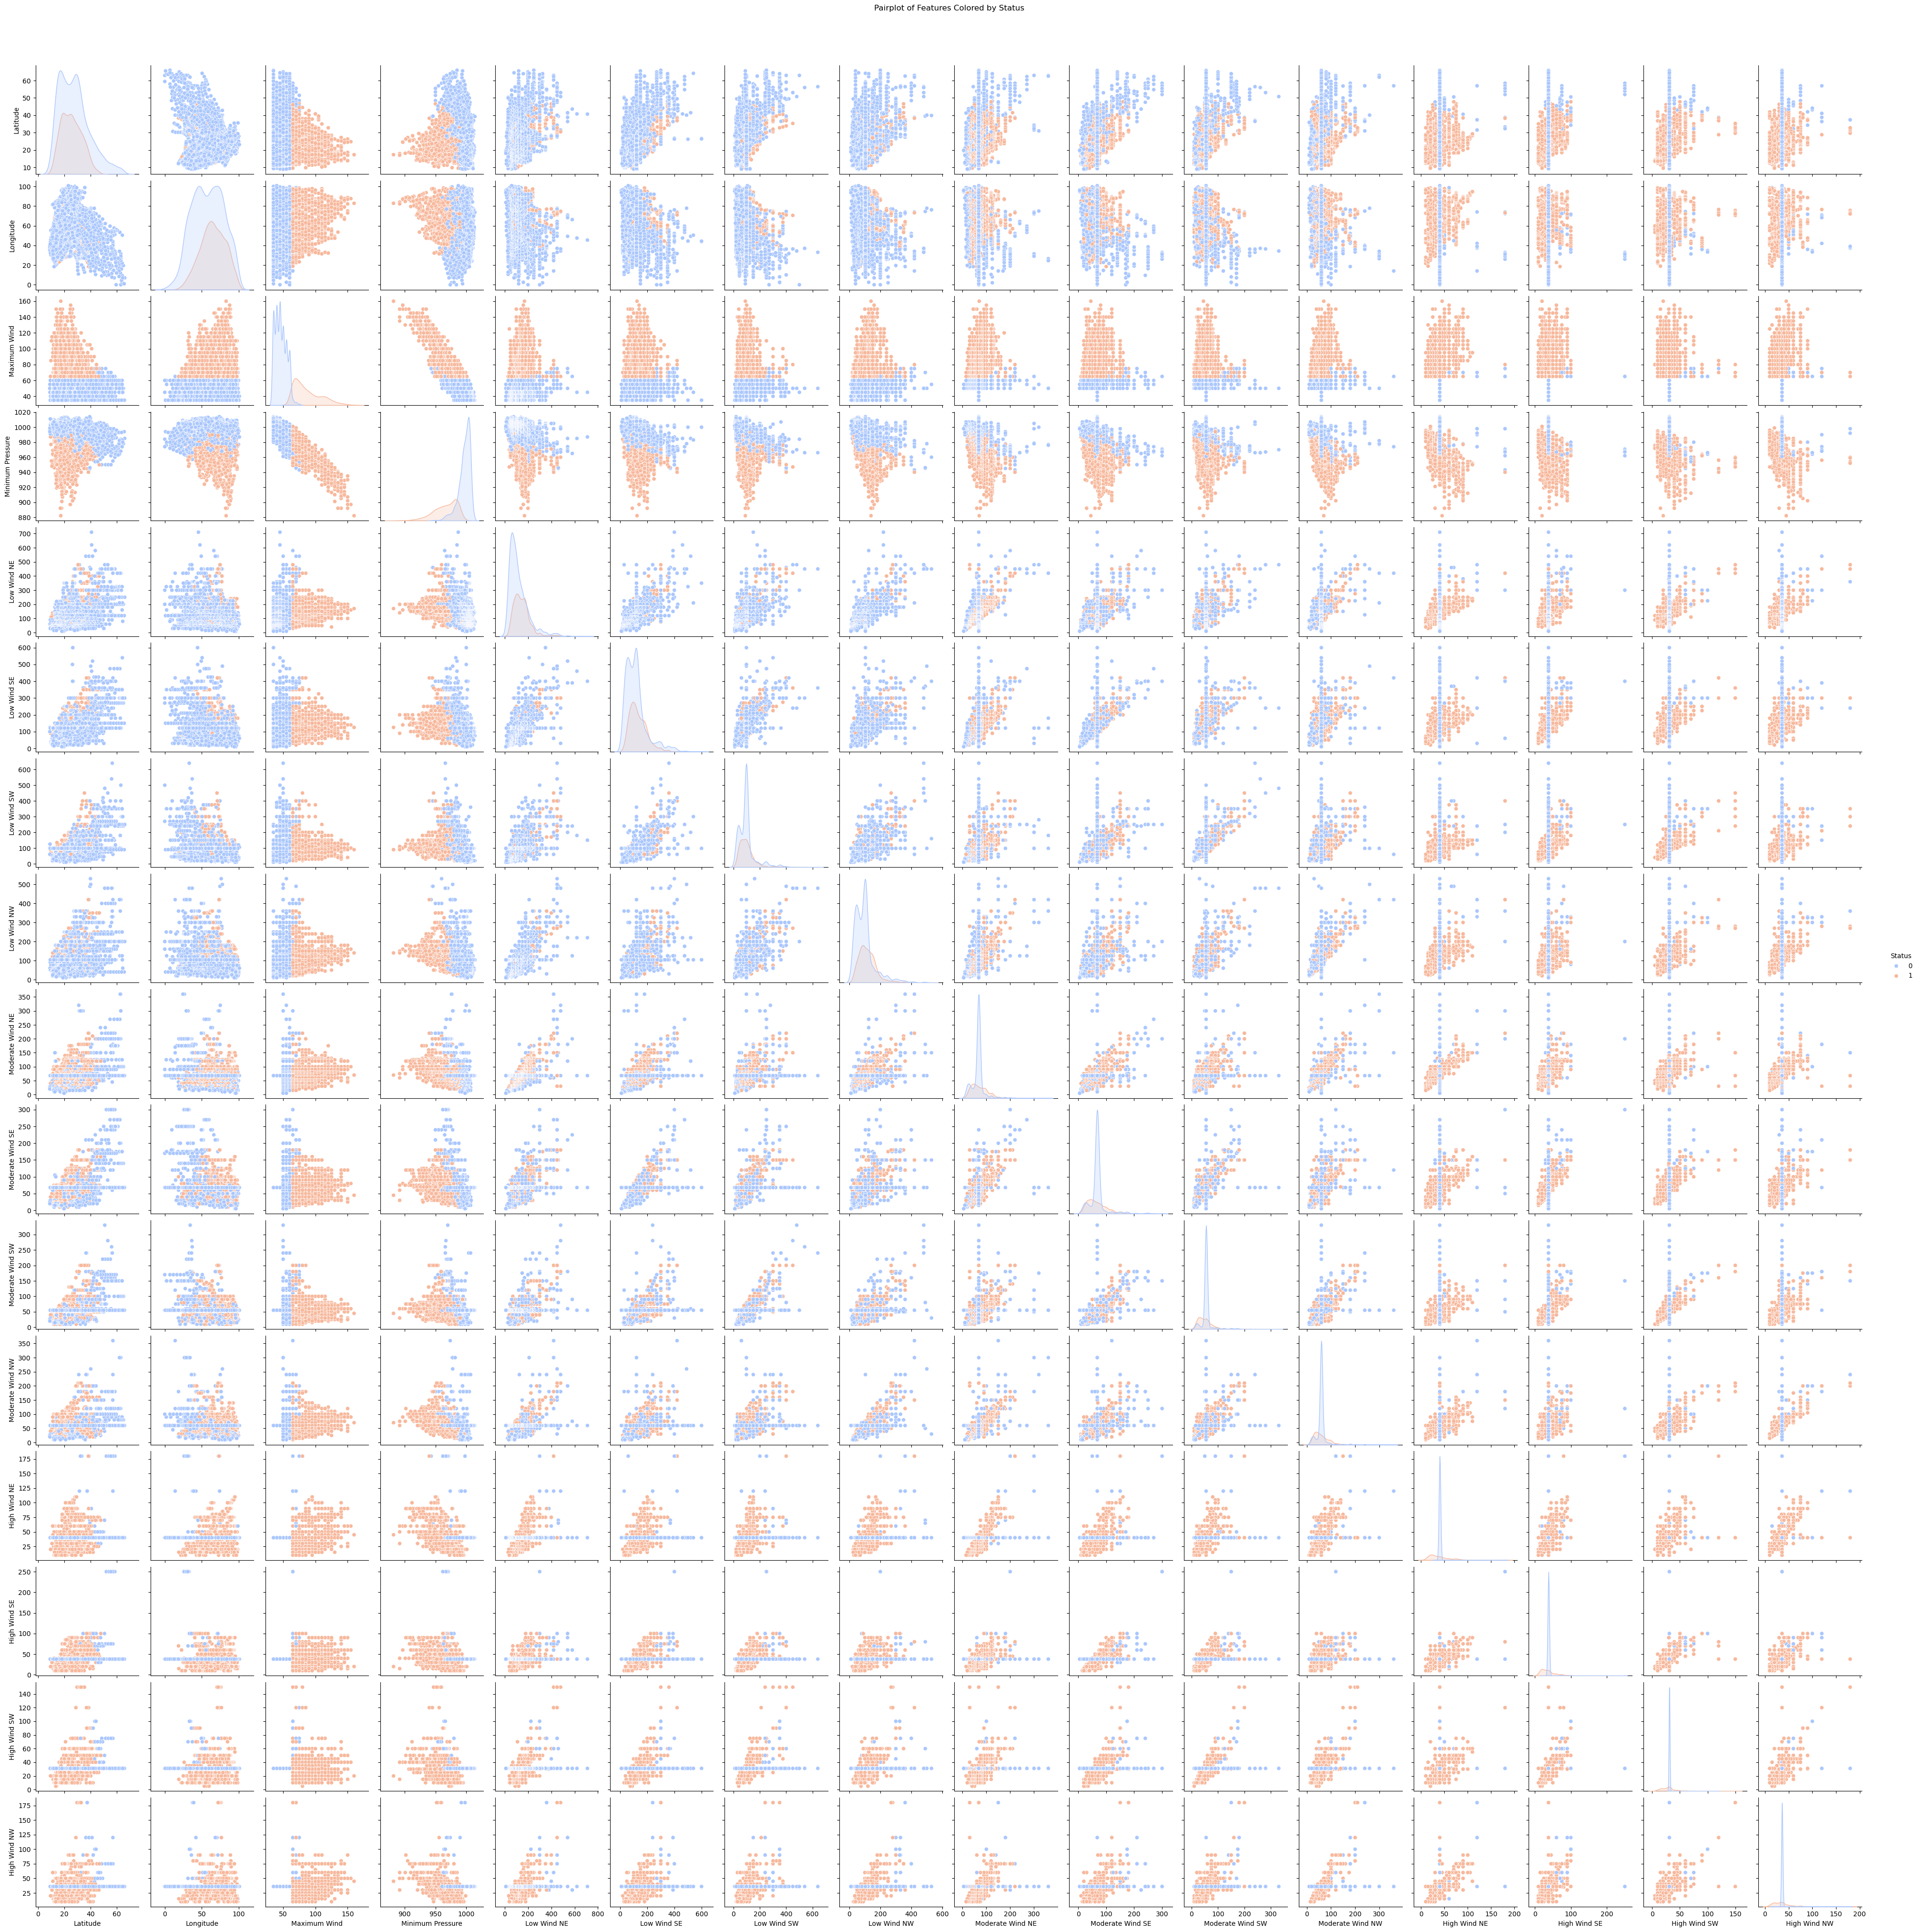

In [170]:

# Visualize pairplot for numerical variables against Status
sns.pairplot(df, hue='Status', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Features Colored by Status', y=1.02)
plt.show()


### 3.2.1 Logistic Regression

We create a parameter grid named `param_grid_log_reg`, which includes:
- `C`: A list of regularization strengths [0.01, 0.1, 1, 10, 100] that control the trade-off between fitting the training data and keeping the model simple.
- `solver`: Common solvers ['lbfgs', 'liblinear'] used to optimize the logistic regression model.
- `penalty`: Set to ['l2'], indicating that we will use L2 regularization, which is the default for most solvers.
- `max_iter`: A list of iteration limits [100, 200, 300] for the optimization algorithm to converge.


In [173]:
# Defining the parameter grid

param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Common solvers
    'penalty': ['l2'],  # Regularization (l2 is default for most solvers)
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

In [174]:
# Initializing the model

log_reg = LogisticRegression()


We perform hyperparameter tuning fortr the Logistic Regression model by initializing `grid_search_log_reg` with the `log_reg` model and its corresponding parameter grid (`param_grid_log_reg`), also using 5-fold cross-validation and verbose output.et.


In [176]:
# Perform Grid Search for the model
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, verbose=1,scoring='recall')

In [177]:
# Fitting the model
grid_search_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='recall', verbose=1)

In [178]:
# Printing the best parameters for the model
print("Best Logistic Regression parameters:", grid_search_log_reg.best_params_)

Best Logistic Regression parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [179]:
# Retraining the models with the best parameters
log_reg_best = grid_search_log_reg.best_estimator_

### 3.2.2 K-Nearest Neighbours Model

 We define the parameter grid `param_grid_knn` with:
- `n_neighbors`: A list of potential neighbors [3, 5, 7, 9, 15] to explore flexibility in the classification.
- `weights`: Options for weighting methods ['uniform', 'distance'] that determine how neighbor contributions are calculated.
- `metric`: Different distance metrics ['euclidean', 'manhattan', 'minkowski'] to measure the distance between data points.

In [182]:
# Defining the parameter grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 15],  # Added more neighbors for flexibility
    'weights': ['uniform', 'distance'],  # Weighting methods
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

In [183]:
# Initializing the model
knn = KNeighborsClassifier()

We perform hyperparameter tuning for K-Nearest Neighbors (KNN) model by creating a `GridSearchCV` object named `grid_search_knn`, where we pass the KNN model (`knn`), the parameter grid (`param_grid_knn`), and set the cross-validation strategy to 5-fold. The `verbose=1` parameter allows us to see the progress of the grid search in the output.

In [185]:
# Perform Grid Search for the model
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, verbose=1,scoring='recall')

In [186]:
# Fitting the model
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [187]:
# Printing the best parameters for the model
print("Best KNN parameters:", grid_search_knn.best_params_)

Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [188]:
# Retraining the models with the best parameters
knn_best = grid_search_knn.best_estimator_

### 3.2.3 Support Vector Classifier Model

We set up the parameter grid `param_grid_svc`, which consists of:
- `C`: A list of regularization parameters [0.1, 1, 10] to adjust the influence of the margin maximization.
- `kernel`: Options for kernel types ['linear', 'rbf'] that define the decision boundary's shape.
- `gamma`: Settings for the kernel coefficient ['scale', 'auto'], which influence the model's sensitivity to individual data points.

In [191]:
# Defining the parameter grids
param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [192]:
# Initializing the model
svc = SVC(probability=True)

we perform a grid search for the Support Vector Classifier (SVC) by creating `grid_search_svc`, where we provide the `svc` model and its parameter grid (`param_grid_svc`), again employing 5-fold cross-validation and setting verbose to 1 for progress tracking. These grid searches will help us identify the best hyperparameters for each model, optimizing their performance on the dataset.

In [194]:
# Perform Grid Search for the model
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, verbose=1,scoring='recall')

In [195]:
# Fitting the model
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall', verbose=1)

In [196]:
# Printing the best parameters for the model
print("Best SVC parameters:", grid_search_svc.best_params_)

Best SVC parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [197]:
# Retraining the model with the best parameters
svc_best = grid_search_svc.best_estimator_

### 3.3 Evaluation and Comparision of Model Performances

In [199]:
# Predict on the test set
y_pred_knn = knn_best.predict(X_test)
y_pred_log_reg = log_reg_best.predict(X_test)
y_pred_svc = svc_best.predict(X_test)

In [200]:
# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
svc_accuracy = accuracy_score(y_test, y_pred_svc)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"SVC Accuracy: {svc_accuracy}")


KNN Accuracy: 0.9817708333333334
Logistic Regression Accuracy: 0.9791666666666666
SVC Accuracy: 0.9774305555555556


### 3.3.1 Confusion Matrices


In this section, we create a subplot with 1 row and 3 columns to compare the confusion matrices of different models side by side. We first compute the confusion matrix for Logistic Regression and display it on the first subplot. Next, we do the same for the K-Nearest Neighbors model on the second subplot. Finally, we plot the confusion matrix for the Support Vector Classifier on the third subplotn.


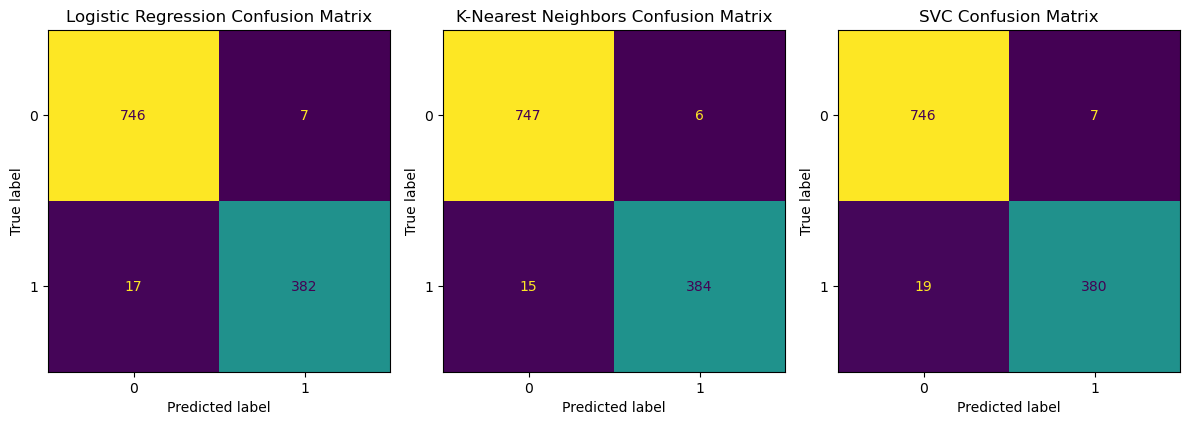

In [203]:

# Create a subplot with 1 row and 2 columns for side-by-side comparison
fig, ax = plt.subplots(1, 3, figsize=(12, 5))  # 1 row, 2 columns

# Logistic Regression Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg)
disp_log_reg.plot(ax=ax[0], colorbar=False)  # Plot on the first subplot (ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

# K-Nearest Neighbors Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp_knn.plot(ax=ax[1], colorbar=False)  # Plot on the second subplot (ax[1])
ax[1].set_title("K-Nearest Neighbors Confusion Matrix")


# SVC Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svc)
disp_svc.plot(ax=ax[2], colorbar=False)  # Plot on the second subplot (ax[2])
ax[2].set_title("SVC Confusion Matrix")

# Adjust layout
plt.tight_layout()
plt.show()


#### **Interpretation of Logistic Regression Confusion Matrix:**
 
There were a total of 389 positive and 763 negative predictions. Out of these:

- **True Positives (TP)**: 382 positive predictions were correct.
- **False Positives (FP)**: 7 positive predictions were incorrect (model predicted a positive case, but it was negative).
- **True Negatives (TN)**: 746 negative predictions were correct.
- **False Negatives (FN)**: 17 negative predictions were incorrect (model predicted a negative case, but it was positive).


 
#### **Interpretation of K-Nearest Neighbors Confusion Matrix:**
 
There were a total of 390 positive and 762 negative predictions. Out of these:

- **True Positives (TP)**: 384 positive predictions were correct.
- **False Positives (FP)**: 6 positive predictions were incorrect (model predicted a positive case, but it was negative).
- **True Negatives (TN)**: 747 negative predictions were correct.
- **False Negatives (FN)**: 15 negative predictions were incorrect (model predicted a negative case, but it was positive).
  
  
 
#### **Interpretation of Support Vector Classifier (SVC) Confusion Matrix:**
 
There were a total of 387 positive and 765 negative predictions. Out of these:

- **True Positives (TP)**: 380 positive predictions were correct.
- **False Positives (FP)**: 7 positive predictions were incorrect (model predicted a positive case, but it was negative).
- **True Negatives (TN)**: 746 negative predictions were correct.
- **False Negatives (FN)**: 19 negative predictions were incorrect (model predicted a negative case, but it was positive).
 

 

### 3.3.2 Performance Metrics


This section calculates and displays key performance metrics for the Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC) models. For each model, we compute accuracy, precision, recall, and F1 score using the test dataset and their respective predicted values. The results are then printed, providing a clear overview of each model's effectiveness in predicting outcomes. These metrics are crucial for evaluating model performance and determining which model best suits our needs. By comparing these values across models, we can make informed decisions on the best approach to cyclone prediction.


In [277]:
### Logistic Regression Performance Metrics

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Metrics:\n")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f} \n\n")


### KNN Performance Metrics

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Metrics:\n")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}\n")


## SVC Performance Metrics

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"SVC Metrics:\n")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_svc:.4f}")

Logistic Regression Metrics:

Accuracy: 0.9792
Precision: 0.9820
Recall: 0.9574
F1 Score: 0.9695 


K-Nearest Neighbors Metrics:

Accuracy: 0.9818
Precision: 0.9846
Recall: 0.9624
F1 Score: 0.9734

SVC Metrics:

Accuracy: 0.9774
Precision: 0.9819
Recall: 0.9624
F1 Score: 0.9669


### 3.3.3 Precision-Recall Curve and AUC



In this section, we calculate the predicted probabilities for each model (Logistic Regression, KNN, and SVC) on the test set using `predict_proba`. We then generate the Precision-Recall curves and compute the Average Precision Score (equivalent to PR-AUC) for each model. The Average Precision Scores for Logistic Regression, KNN, and SVC are printed to evaluate their performance. Finally, we plot the Precision-Recall curves for all three models, providing a visual comparison of their precision and recall at different thresholds.


Average Precision for logistic regression(AP): 1.00
Average Precision for KNN(AP): 0.99
Average Precision for SVC(AP): 0.99


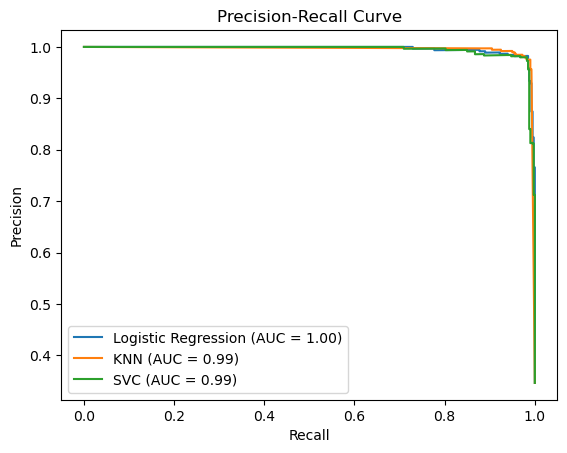

In [209]:
# Logistic Regression probabilities
y_prob_log_reg = log_reg_best.predict_proba(X_test)[:, 1]

# KNN probabilities
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# SVC probabilities
y_prob_svc = svc_best.predict_proba(X_test)[:, 1]

# Precision-Recall curve for Logistic Regression
precision_log_reg, recall_log_reg, thresholds = precision_recall_curve(y_test, y_prob_log_reg)

# Compute Average Precision Score for logistic regression (equivalent to PR-AUC)
average_precision_log_reg = average_precision_score(y_test, y_prob_log_reg)
print(f"Average Precision for logistic regression(AP): {average_precision_log_reg:.2f}")

# Precision-Recall curve for KNN
precision_knn, recall_knn, thresholds = precision_recall_curve(y_test, y_prob_knn)

# Compute Average Precision Score for KNN (equivalent to PR-AUC)
average_precision_knn = average_precision_score(y_test, y_prob_knn)
print(f"Average Precision for KNN(AP): {average_precision_knn:.2f}")


# Precision-Recall curve for SVC
precision_svc, recall_svc, thresholds = precision_recall_curve(y_test, y_prob_svc)

# Compute Average Precision Score for SVC (equivalent to PR-AUC)
average_precision_svc = average_precision_score(y_test, y_prob_svc)
print(f"Average Precision for SVC(AP): {average_precision_svc:.2f}")


# Plot Precision-Recall curves
plt.plot(recall_log_reg, precision_log_reg, label=f'Logistic Regression (AUC = {average_precision_log_reg:.2f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {average_precision_knn:.2f})')
plt.plot(recall_svc, precision_svc, label=f'SVC (AUC = {average_precision_svc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### 3.3.4 ROC Curve and AUC



In this section, we compute the ROC curve and AUC-ROC score for three models: Logistic Regression, KNN, and SVC. We calculate the false positive rate (FPR) and true positive rate (TPR) using `roc_curve` for each model and derive the AUC-ROC score with `roc_auc_score`. The AUC scores are printed to evaluate model performance. Finally, we visualize the ROC curves for all three models in a single plot, comparing their performance against a random guess line. This helps us understand how well each model distinguishes between the classes.


AUC-ROC for Logistic Regression: 1.00
AUC-ROC for KNN: 0.99
AUC-ROC for SVC: 1.00


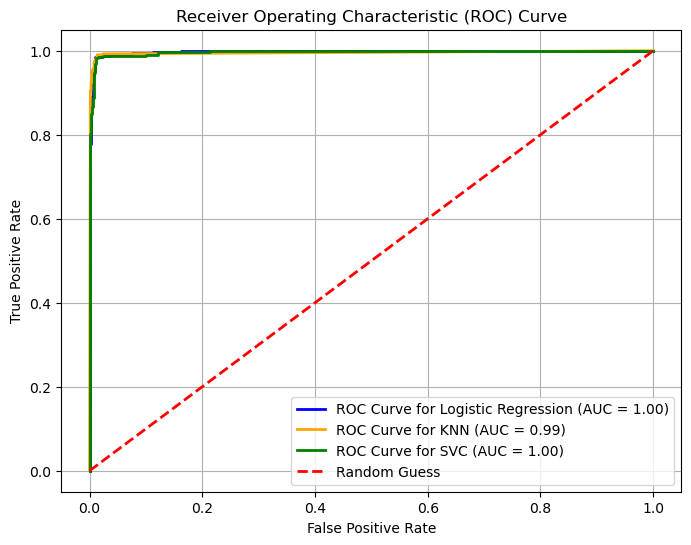

In [212]:

# Compute ROC curve for logistic Regression
fpr_log_reg, tpr_log_reg, thresholds = roc_curve(y_test, y_prob_log_reg)

# Compute AUC-ROC for logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"AUC-ROC for Logistic Regression: {roc_auc_log_reg:.2f}")


# Compute ROC curve for KNN
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_prob_knn)

# Compute AUC-ROC for KNN
roc_auc_KNN = roc_auc_score(y_test, y_prob_knn)
print(f"AUC-ROC for KNN: {roc_auc_KNN:.2f}")

# Compute ROC curve for SVC
fpr_SVC, tpr_SVC, thresholds = roc_curve(y_test, y_prob_svc)

# Compute AUC-ROC for SVC
roc_auc_SVC = roc_auc_score(y_test, y_prob_svc)
print(f"AUC-ROC for SVC: {roc_auc_SVC:.2f}")


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'ROC Curve for Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_KNN, tpr_KNN, color='orange', lw=2, label=f'ROC Curve for KNN (AUC = {roc_auc_KNN:.2f})')
plt.plot(fpr_SVC, tpr_SVC, color='green', lw=2, label=f'ROC Curve for SVC (AUC = {roc_auc_SVC:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

## 4. Recommendations and Conclusion

After evaluating the three models **Logistic Regression**, **K-Nearest Neighbors (KNN)**, and **Support Vector Classifier (SVC)**.We recommend using the **K-Nearest Neighbors (KNN)** model for predicting hurricanes. This model strikes the best balance between avoiding missed hurricanes and reducing unnecessary false alarms, which is critical when dealing with something as life-threatening as a hurricane.
 
### **Why KNN is the Best Choice:**
 
1. **Avoiding Missed Hurricanes (False Negatives):**  
   The biggest concern in hurricane prediction is making sure no real hurricanes go unnoticed. A **False Negative** when the model misses a real hurricane can have devastating consequences. People might not prepare or evacuate in time, putting lives and property at risk. The **KNN model** only missed **15 hurricanes**, fewer than the other models, which means it’s better at catching real hurricanes when they happen.
 
2. **Reducing False Alarms (False Positives):**  
   While it’s not as bad as missing a hurricane, predicting one when there isn't can still cause unnecessary stress. False alarms lead to evacuations, resource use, and public panic. However, the **KNN model** had just **6 false alarms**, the lowest among all three models. This means it does a great job of predicting hurricanes without causing too many unnecessary warnings.
 
3. **Balanced Approach:**  
   What makes **KNN** really stand out is how well it balances between the two: it doesn’t miss many real hurricanes, and it doesn’t trigger too many false alarms. This balance is key because we want people to trust the warnings but not be overwhelmed by too many unnecessary ones.
 


### Conclusion
In a nutshell, the **K-Nearest Neighbors (KNN)** model is the best option for hurricane prediction. It predicts most of the real hurricanes, making sure people are prepared and safe, while keeping the number of false alarms to a minimum. By using KNN, we can help communities stay ready for hurricanes without overloading them with unnecessary warnings.